In [3]:
%matplotlib inline

# Twitter Gender Classification

This notebook will show our final project. We will use a DB to build a classification model for tweets. The model will classify the tweet writer by gender.

## Submitted by: Shaked Eyal 201605870 && Tomer Shahar 302223979

### Data Presentation - Part 1

In this section we will analyze the DB like class distribution and frequent terms.

In [4]:
import warnings
from DataPresentation import DataPresentation

warnings.filterwarnings('ignore')

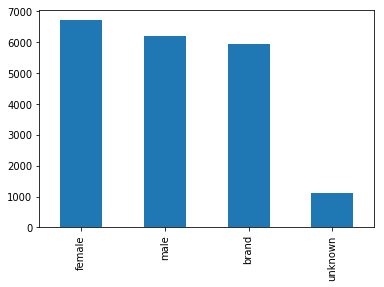

In [5]:
dp = DataPresentation()
data = dp.read_csv()

As we can see, most of the tweets are from females, after that the male tweeters and lastly brands. Also we can see that we have an Unknown gender that we need to clean up.

In [6]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


 This is the DB itself. We present here the first 5 rows. As we can see we have 26 columns for each row.

In [7]:
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [8]:
dp.data_to_df(data)
dp.print_common()


Male most common terms:  58767
[('get', 442),
 ('like', 390),
 ('go', 315),
 ("i'm", 303),
 ('one', 293),
 ('time', 253),
 ('love', 251),
 ('make', 241),
 ('day', 223),
 ('new', 215),
 ('know', 201),
 ('see', 200),
 ('look', 197),
 ('peopl', 196),
 ('good', 188),
 ('think', 185),
 ('want', 178),
 ('need', 171),
 ('follow', 170),
 ('2', 168)]
Female most common terms:  60168
[("i'm", 528),
 ('like', 482),
 ('get', 457),
 ('go', 412),
 ('__', 399),
 ('love', 392),
 ('day', 360),
 ('one', 358),
 ('make', 335),
 ('time', 290),
 ('want', 256),
 ('peopl', 245),
 ('know', 232),
 ('follow', 217),
 ('look', 217),
 ('new', 205),
 ('amp', 203),
 ('___', 195),
 ('best', 192),
 ('got', 190)]
Brand most common terms:  59302
[('weather', 2279),
 ('get', 1380),
 ('updat', 1174),
 ('channel', 1173),
 ('15', 1169),
 ('40', 732),
 ('39', 424),
 ('new', 243),
 ('amp', 191),
 ('like', 186),
 ('make', 185),
 ('us', 166),
 ('look', 164),
 ('one', 162),
 ('love', 155),
 ('see', 145),
 ('day', 139),
 ('2', 135

## Part 2 - Train Models
In this part we are training the "Simple Models" SVM and Perceptron, and using GridSearchCV to tune up the parameters so we can find the best model.
After that we train CNN model with keras library and compare it to the best model we found so far. The best one will be used to predict on the twitts.
Also we are training a CNN to predict the gender.

In [9]:
from train_model import TrainModels
tm = TrainModels(dp.data_frame)
best_model = tm.train_models()

Using TensorFlow backend.


TF-IDF Feature Extraction
DONE!!!!! total time: 0.404630s
SVM
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
The training time was: 0.050s
The test time was: 0.000s
accuracy: 0.564
Perceptron
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
The training time was: 0.031s
The test time was: 0.000s
accuracy: 0.511
The best classification for this corpus is: SVM
Best parameters: {'vect__stop

As we can see the best model is the CNN (based on keras library) is the most accurate of all the models.

In [13]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 12006     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 12,069
Trainable params: 12,069
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Get Tweets from twitter

#### Here we will collect 15,000 tweets from twitter using the streaming option of the API. We'll save all of them in a json file and will process them. We were asked to get the tweets from the most common location based on the training data, so we'll start by discovering that:

In [14]:
    from sklearn.model_selection import train_test_split
    from DataPresentation import DataPresentation
    
    dp = DataPresentation()
    data = dp.read_csv(print_graph=False)
    
    train_data, test_data = train_test_split(data, test_size=0.2)
    most_common_countries = dp.find_most_common_country(train_data, 5)
    for country in most_common_countries:
        print(country)

('London', 126)
('United States', 113)
('UK', 79)
('USA', 76)
('Los Angeles, CA', 58)


As we can see, London is the most popular location so we will collect tweets from there. We need to get London's geo location in order to apply it as a filter. Londons location can be obtained from this site: http://boundingbox.klokantech.com/
We apply London's coordinates as a filter for the streaming object:
[-0.510375, 51.28676, 0.334015, 51.691874]

After gathering 15,000 tweets from London, we can now parse and analyze them:

In [15]:
tweets_location = '.\\tweets_from_stream.json'
# We can decide whether to filter out stopwords and punctuation marks.

parsed_tweets, tweet_distribution = dp.process_tweets(tweets_location, filter_words=True)
most_common = dp.get_most_common_words(tweet_distribution)

print("filtered words:")
for i in range(20):
    print(f'{i+1}. {most_common[i][0]} - {most_common[i][1]} Times ')

    
print("\nunfiltered words:")
parsed_tweets, tweet_distribution = dp.process_tweets(tweets_location, filter_words=False)
most_common = dp.get_most_common_words(tweet_distribution)
for i in range(20):
    print(f'{i+1}. {most_common[i][0]} - {most_common[i][1]} Times ')

filtered words:
1. thank - 923 Times 
2. get - 861 Times 
3. day - 848 Times 
4. one - 780 Times 
5. london - 779 Times 
6. like - 759 Times 
7. good - 744 Times 
8. love - 728 Times 
9. go - 705 Times 
10. peopl - 651 Times 
11. amp - 649 Times 
12. see - 628 Times 
13. look - 625 Times 
14. think - 551 Times 
15. time - 549 Times 
16. today - 543 Times 
17. im - 535 Times 
18. know - 532 Times 
19. work - 531 Times 
20. morn - 527 Times 

unfiltered words:
1. . - 16576 Times 
2. the - 9362 Times 
3. to - 6190 Times 
4. , - 6165 Times 
5. a - 5883 Times 
6. ! - 4763 Times 
7. and - 4209 Times 
8. i - 4137 Times 
9. of - 4021 Times 
10. you - 3882 Times 
11. in - 3484 Times 
12. is - 3277 Times 
13. for - 3191 Times 
14. ? - 3024 Times 
15. it - 2922 Times 
16. thi - 2487 Times 
17. on - 2268 Times 
18. that - 2137 Times 
19. have - 1797 Times 
20. be - 1657 Times 


Notice that if we do not filter the words, all the top 20 words are stopword or punctuation marks.
There is a lot of similarity between the streamed tweets and the training set common words. However, not an exact corelation.

# Part 4: Classifying the streamed tweets

### As shown in part 2, the best classifier was the DNN classifier from Keras. We will load it and use that one on the new tweets:

In [17]:
from keras.models import load_model

model = load_model('.\\best_model.h5')
results_file = '.\\prediction_results.csv'
with open(results_file, 'w') as res:
    header = "tweet,prediction,confidence\n"
    res.write(header)

predictions = dp.predict_gender(model, parsed_tweets, tm.tokenizer, tm.lb_make)

with open(results_file, 'a') as res:
    for idx in range(len(predictions)):
        res.write(f'{parsed_tweets[idx]}, {predictions[idx]}, {idx}\n')

results = dp.aggregate_predictions(predictions)
for res, num in results.items():
    print(f'Number of {res}s: {num}')


KeyError: 'male'